 99%|===================| 1921/1941 [01:17<00:00]        

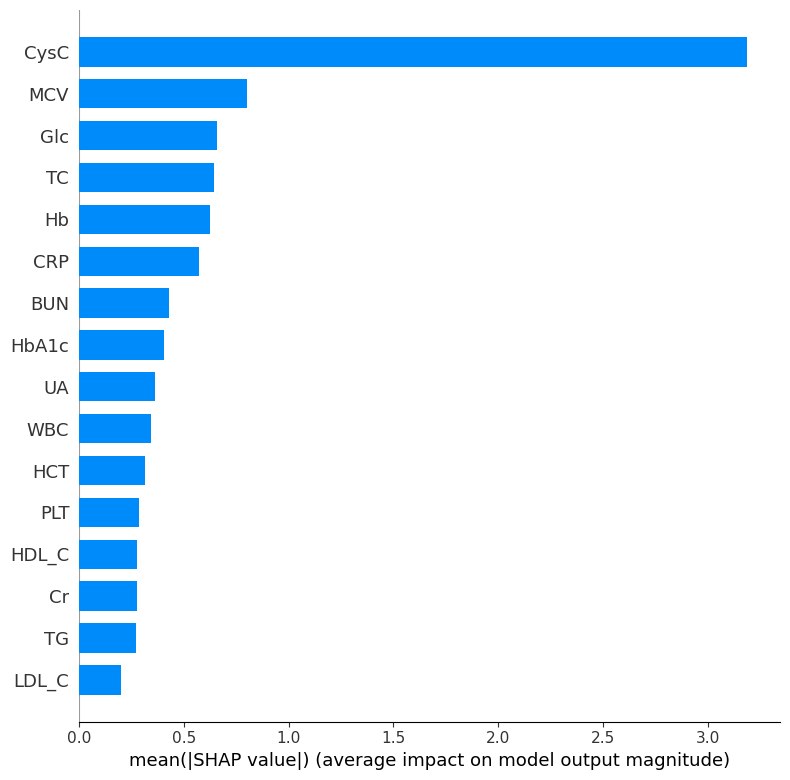

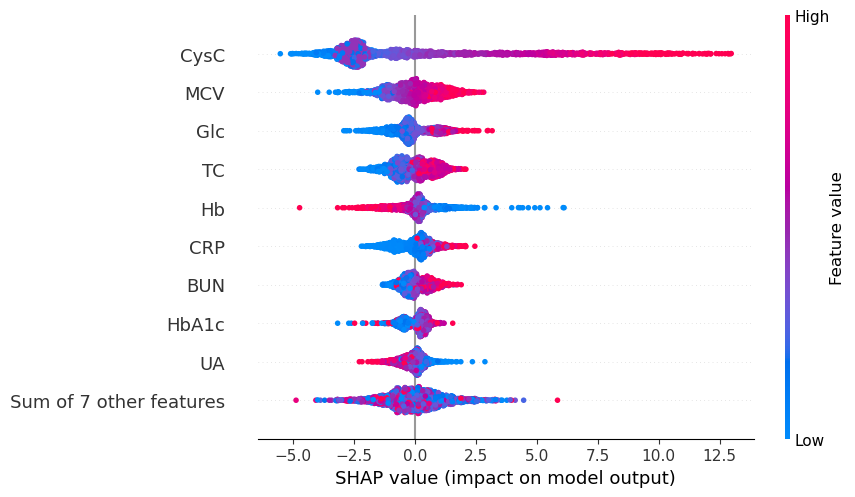

Top 5 features: ['CysC', 'MCV', 'Glc', 'TC', 'Hb']


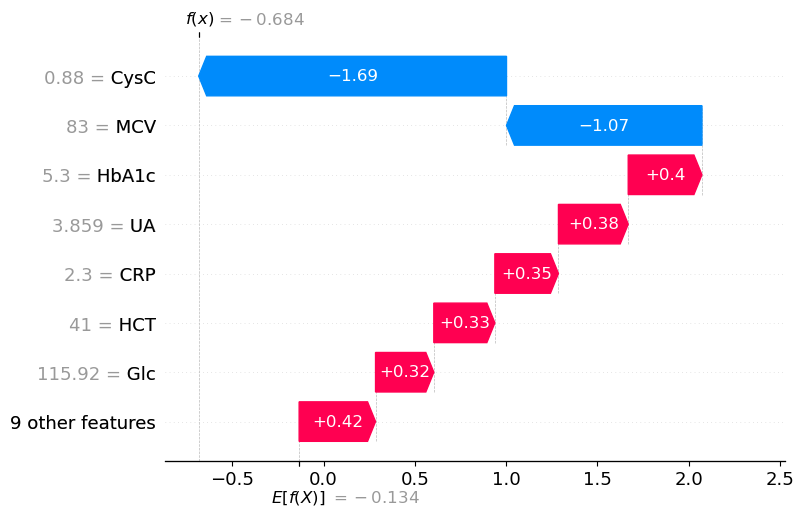

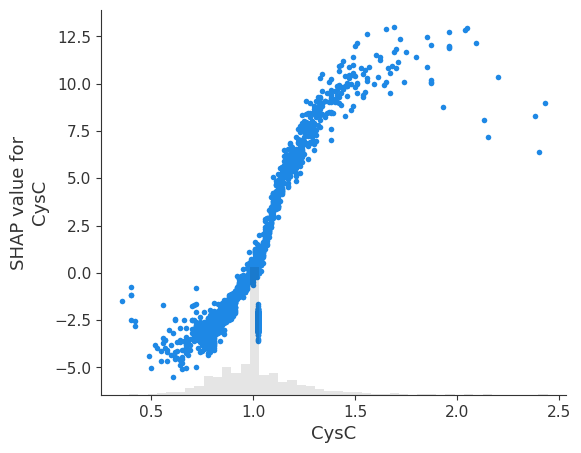

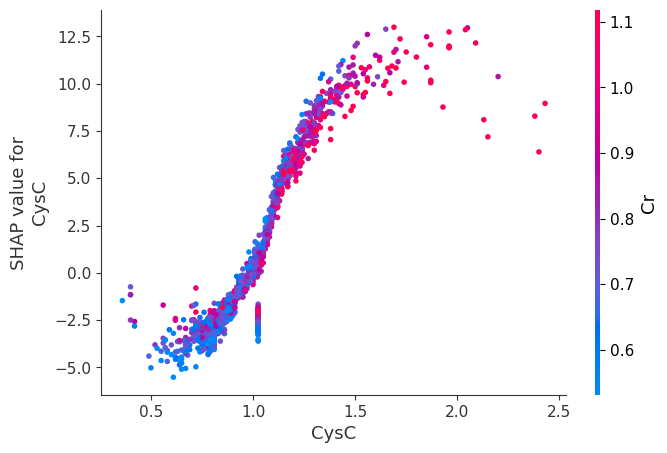

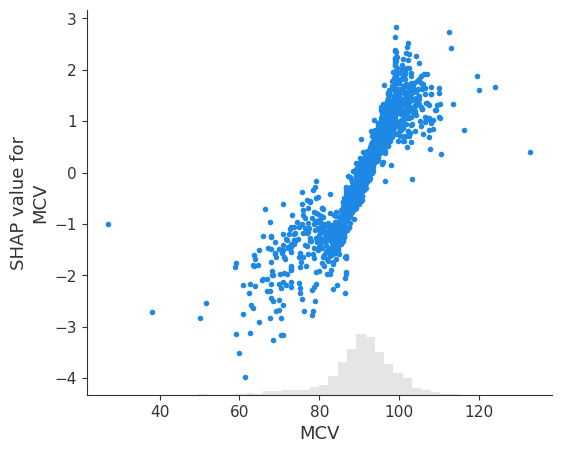

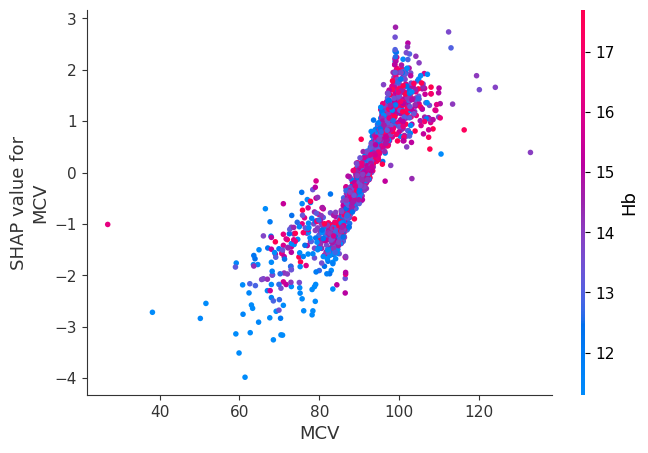

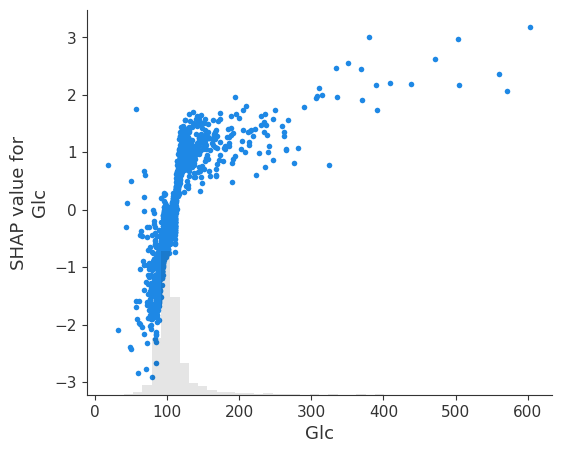

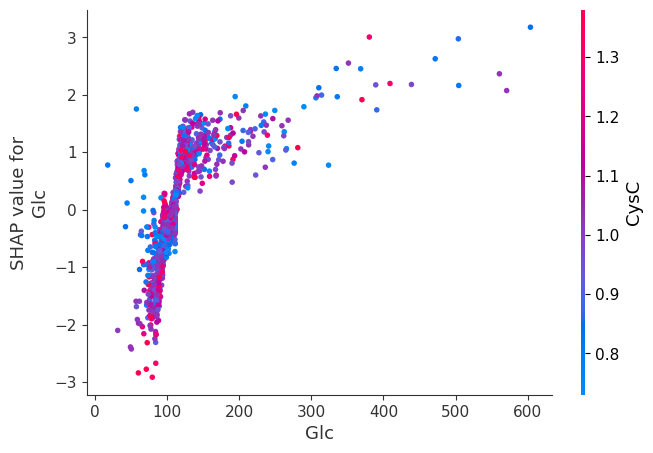

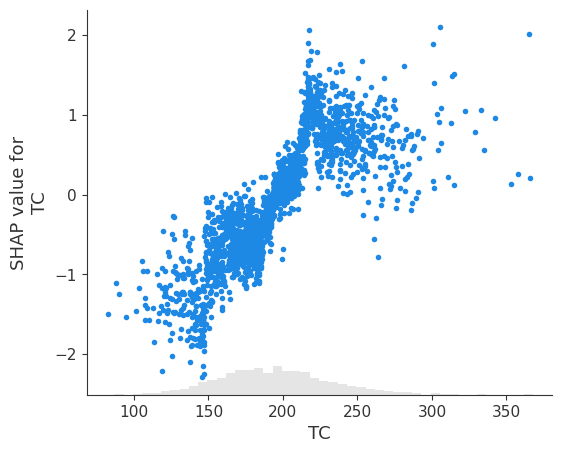

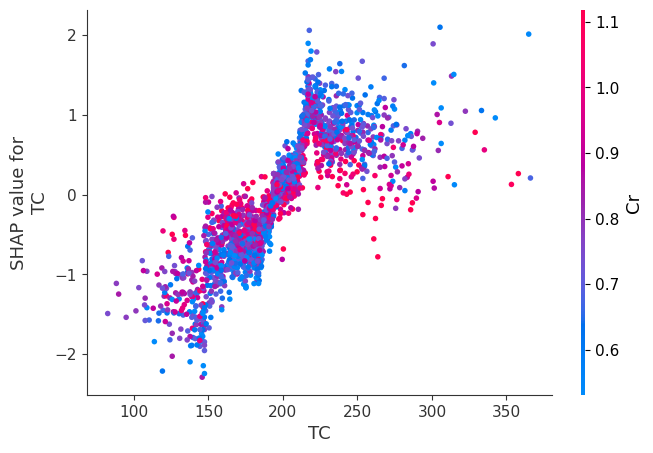

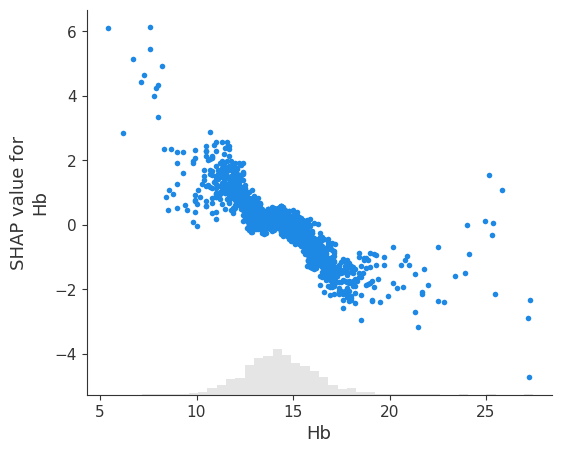

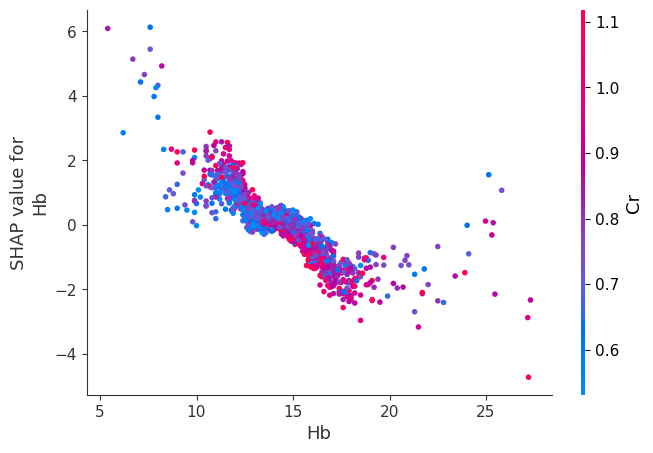

In [2]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data2011.csv')

# Select the target variable (Y) and the features (X)
target = 'ca'
features = ['WBC', 'MCV', 'PLT', 'BUN', 'Glc', 'Cr', 'TC', 'TG', 'HDL_C', 'LDL_C', 'CRP', 'HbA1c', 'UA', 'HCT', 'Hb', 'CysC']

# Split the data into X and Y
sampled_data = data.sample(frac=1, random_state=42)
X = sampled_data[features]
Y = sampled_data[target]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the CatBoost model
model = CatBoostRegressor(verbose=0)
model.fit(X_train, Y_train)

# Explain the model using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)

# Set feature names for SHAP values
shap_values.feature_names = features

# Summary plot (global explanation)
shap.summary_plot(shap_values, X_test, plot_type='bar')
shap.plots.beeswarm(shap_values)

# Identify the top 5 features
shap_values_df = pd.DataFrame(shap_values.values, columns=features)
abs_shap_values = shap_values_df.abs().mean(axis=0)
top_features = abs_shap_values.sort_values(ascending=False).head(5).index.tolist()
print("Top 5 features:", top_features)

# Waterfall plot for the first sample
shap.initjs()
shap.plots.waterfall(shap_values[0], max_display=8)

# Scatter plots and PDPs for the top 5 features
for feature in top_features:
    shap.plots.scatter(shap_values[:, feature])
    plt.show()

    shap.dependence_plot(feature, shap_values.values, X_test, display_features=X_test)
    plt.show()
